# Question 2: Principal Component Analysis (PCA)

Brief information about Olivetti Dataset:
- Face images taken between April 1992 and April 1994.
- There are ten different image of each of 40 distinct people
- There are 400 face images in the dataset
- Face images were taken at different times, variying ligthing, facial express and facial detail
- All face images have black background
- The images are gray level
- Size of each image is 64x64
- Image pixel values were scaled to [0, 1] interval
- Names of 40 people were encoded to an integer from 0 to 39

# 2.1
- Apply PCA on Olivetti faces dataset, while preserving 99% of the variance. Then compute the
reconstruction error for each image

Importing packages and data

In [4]:
from sklearn import datasets
from sklearn.decomposition import PCA
from skimage.transform import rotate
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

faces = datasets.fetch_olivetti_faces()
X = pd.DataFrame(faces.data)

Performing the PCA and understanding the dimensions

In [5]:
pca = PCA(0.99) # set min. explained variance to 99%
X_reduced = pca.fit_transform(X) # fit and transform on the original data
X_reconstructed = pca.inverse_transform(X_reduced) # reconstruct / project the reduced dimensions onto the original dimensions
print("Shape of original data matrix:", X.shape)
print("Shape of reduced data matrix:", X_reduced.shape)
print("Shape of principal components matrix:", pca.components_.shape)
print("\n --> Reduced the number of dimensions from 4096 to 260 \n (meaning, there are 260 principle components)")

Shape of original data matrix: (400, 4096)
Shape of reduced data matrix: (400, 260)
Shape of principal components matrix: (260, 4096)

 --> Reduced the number of dimensions from 4096 to 260 
 (meaning, there are 260 principle components)


Visually inspecting the differences between the original data and the reconstructed data

In [6]:
print("Original Data (first 3 rows and cols):")
print(X.iloc[:3,:3])
print("\n")
print("Reconstructed Data (first 3 rows and cols):")
print(pd.DataFrame(X_reconstructed).iloc[:3,:3])
print("\n")
print("Variance explained:", pca.explained_variance_ratio_.sum())

Original Data (first 3 rows and cols):
          0         1         2
0  0.309917  0.367769  0.417355
1  0.454545  0.471074  0.512397
2  0.318182  0.400826  0.491736


Reconstructed Data (first 3 rows and cols):
          0         1         2
0  0.348415  0.393158  0.417710
1  0.461921  0.496875  0.513311
2  0.315902  0.379791  0.478694


Variance explained: 0.99000543


Calculating the reconstruction error per Image and the mean od the error over all images

In [7]:
reconstruction_error_image = np.sum((X-X_reconstructed)**2, axis=1) # axis=1 to take the sum of the error per image (row) 
reconstruction_error_mean = reconstruction_error_image.mean() # mean of all 400 reconstruction errors

print("Reconstruction error per image (400):")
print(reconstruction_error_image)
print("\n")
print("Average of the 400 reconstruction errors:")
print(reconstruction_error_mean)

Reconstruction error per image (400):
0      1.068525
1      0.680359
2      0.671687
3      1.130420
4      0.439475
         ...   
395    0.999687
396    1.067704
397    1.093128
398    0.922224
399    0.817903
Length: 400, dtype: float32


Average of the 400 reconstruction errors:
0.7887710332870483


# 2.2) 
- Next, take some of the images you built using the PCA (previous step) and modify/add some
noise to some of the images using techniques such as rotate, flip, and darken.
- look at their reconstruction error. You should also notice how much
larger the reconstruction error is.

In [8]:
def build_plot(images, rows, cols): # function requires 3D array with 400x64x64
    fig, axes = plt.subplots(rows, cols) # create plot with specified sublpots
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i], cmap="gray")
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

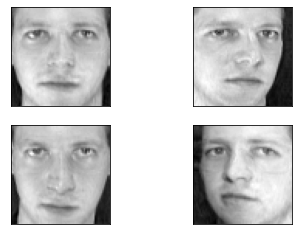

In [9]:
X_reconstructed = X_reconstructed.reshape((400, 64, 64))
build_plot(X_reconstructed.reshape((400, 64, 64)), 2, 2) # plot original images

Flip the reconstructed images upside down

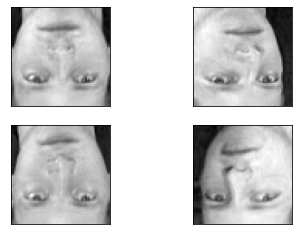

In [10]:
X_reconstructed_ud = []
for row in X_reconstructed:
    X_reconstructed_ud.append(np.flipud(row)) # flip each image row wise
X_reconstructed_ud = np.array(X_reconstructed_ud) # make the list an array again => shape 400x4096

X_reconstructed_ud = X_reconstructed_ud.reshape((400, 64, 64))
build_plot(X_reconstructed_ud, 2, 2) # plot flipped images

Rotate the reconstructed images 90 degrees couter-clockwise

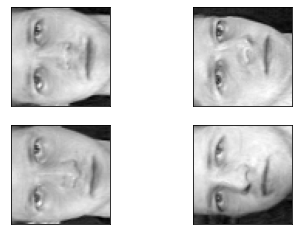

In [11]:
X_reconstructed_rt = []
for row in X_reconstructed:
    X_reconstructed_rt.append(rotate(row.reshape((64,64)), 90)) # rotate each image counter-clockwise
X_reconstructed_rt = np.array(X_reconstructed_rt) # make the list an array again => shape 400x4096

build_plot(X_reconstructed_rt, 2, 2) # plot rotated images

Random Noise

In [21]:
from skimage.util import random_noise
X_reconstructed_rn = random_noise(X_reconstructed, mode="gaussian", mean=0, var=0.01) # add random noise to every pixels

Darken Image

In [49]:
from skimage import exposure
X_reconstructed_ex = exposure.rescale_intensity(X_reconstructed, in_range=(0,50)) # darken image by changing intensity of every pixel

Calculate reconstruction error after adding noise

In [50]:
# Reshaping the arrays to original shape
X_reconstructed = X_reconstructed.reshape((400, 4096))
X_reconstructed_ud = X_reconstructed_ud.reshape((400, 4096))
X_reconstructed_rt = X_reconstructed_rt.reshape((400, 4096))
X_reconstructed_rn = X_reconstructed_rn.reshape((400, 4096))
X_reconstructed_ex = X_reconstructed_ex.reshape((400, 4096))

# Calculating the mean rec. error over all images
rc_error_og = np.sum((X-X_reconstructed)**2, axis=1).mean()
rc_error_ud = np.sum((X-X_reconstructed_ud)**2, axis=1).mean()
rc_error_rt = np.sum((X-X_reconstructed_rt)**2, axis=1).mean()
rc_error_rn = np.sum((X-X_reconstructed_rn)**2, axis=1).mean()
rc_error_ex = np.sum((X-X_reconstructed_ex)**2, axis=1).mean()

print("Reconstruction error for the original reconstruction: \n", rc_error_og)
print("Reconstruction error for the flipped reconstruction: \n", rc_error_ud)
print("Reconstruction error for the rotated reconstruction: \n", rc_error_rt)
print("Reconstruction error for the reconstruction with random noise: \n", rc_error_rn)
print("Reconstruction error for the darkened reconstruction: \n", rc_error_ex)
np.sum((X-X_reconstructed)**2, axis=1)

Reconstruction error for the original reconstruction: 
 0.7887710332870483
Reconstruction error for the flipped reconstruction: 
 176.6029052734375
Reconstruction error for the rotated reconstruction: 
 193.7677001953125
Reconstruction error for the reconstruction with random noise: 
 41.40407081889734
Reconstruction error for the darkened reconstruction: 
 1294.318115234375


0      1.068525
1      0.680359
2      0.671687
3      1.130420
4      0.439475
         ...   
395    0.999687
396    1.067704
397    1.093128
398    0.922224
399    0.817903
Length: 400, dtype: float32

Index of displaed images [269, 367, 284, 132, 309]


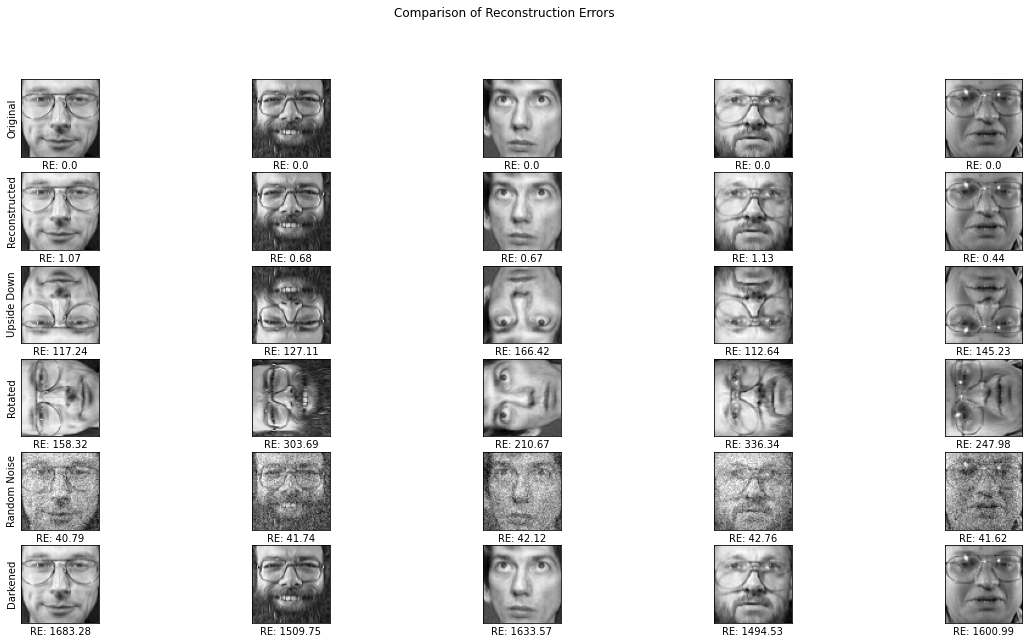

In [52]:
X_np = X.to_numpy()

from random import randint

def compare_plots(n):
    data = [X_np, X_reconstructed, X_reconstructed_ud, X_reconstructed_rt, X_reconstructed_rn, X_reconstructed_ex] # selecting the four arrays constructed earlier
    titles = ["Original", "Reconstructed", "Upside Down", "Rotated", "Random Noise", "Darkened"] # titles for the series
    ri = [randint(0,399) for i in range(n)] # generate random indeces of images (between 0 and 399)
    
    fig, axes = plt.subplots(6, n, figsize=(20, 10))
    for i in range(len(data)):
        for m in range(n):
            axes[i,m].imshow(data[i][ri[m]].reshape((64, 64)), cmap="gray") # i: choose data, ri[m]: get random integer for range(n)
            re = np.sum((X_np[m]-data[i][m])**2) # calculate the reconstruction error for each image
            axes[i,m].set_xlabel("RE: "+str(round(re, 2))) # set the x-axis label to the re
            axes[i,m].set_xticks([]) # remove xticks / axis
            axes[i,m].set_yticks([]) # remove yticks / axis
    st = fig.suptitle("Comparison of Reconstruction Errors")
    for ax, col in zip(axes[:, 0], titles): # setting the yaxis label to name of series 
        ax.set_ylabel(col)

    print("Index of displaed images", ri)
    return fig

plt.show(compare_plots(5))